# After Class - Visualizaciones

La idea es practicar y repasar los dado en estas semanas atras que corresponde a pandas como a visualizaciones en matplotlib o seaborn

## Ejercicio 1

Dado un datasets de informacion de vehiculos las cuales consiste en 8 variables
,

*   mpg - millas por galeon de combustible
*   cylinders -  cuantos cilindron tiene el auto
*.  displacement - desplazamiento millas
*.  horsepower - caballos de fuerza
*.  weight - Peso
*.  acceleration - acceleracion
*.  model_year = año que se armo el vehiculo
*.  Origin -  es la ubicacion donde fue creado (1-USA , 2-Europa, 3-Resto mundo)

Se debe realizar :

1) Resumen de medidas estadisticas a todas las variables numericas

2) Verificar si tiene valores nulos y en que columna,  si es asi llenarlos con el promedio

3) Realizar un grafico de barras donde contabilizemos la cantidad de autos segun su año de construccion. El tamano debe ser de 15,10. recomiendo usar seaborn y la funcion countplot

4) Un histrograma de desplazamiento con 8 bins o agrupaciones




In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df_mpg = pd.read_csv('https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv')

import matplotlib.pyplot as plt

In [ ]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Resolucion de ejercicio

#parte1

df_mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
#Parte 2

#df_mpg.isnull().values.any()

#otra manera
df_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

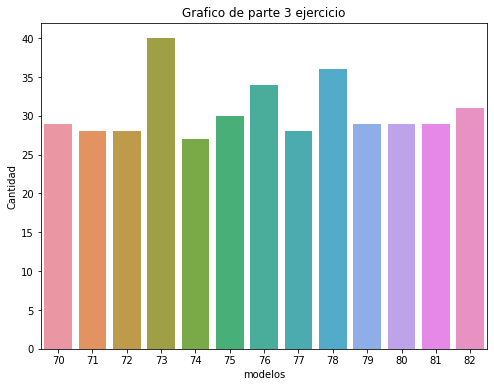

In [ ]:
#parte3
import seaborn as sns

#genero el lienzo
fig , ax = plt.subplots(figsize=(8,6))


ax = sns.countplot(x="model_year",data=df_mpg)

ax.set_title('Grafico de parte 3 ejercicio')
ax.set_xlabel('modelos')
ax.set_ylabel('Cantidad');

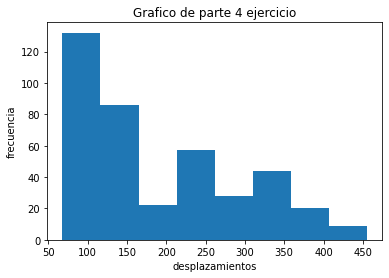

In [ ]:
#parte 4
fig , ax = plt.subplots()

ax.hist(df_mpg['displacement'], bins=8)

ax.set_title('Grafico de parte 4 ejercicio')
ax.set_xlabel('desplazamientos')
ax.set_ylabel('frecuencia');

## Ejemplo

Re realiza un grafico un poco mas avanzado donde utlizaremos bucle for para realziar unos graficos dentro de un subplot(2,2)

Vamos a ir iterando con variables relacionado a cateogoricas

Las variables son origin , cylinders , model_year y una nueva que vamos a crear


In [ ]:
### Creando una nueva variable


#Procedimiento
# generamos el nombre de la variable nueva
# seleccionamos la columna que queremos trabajar
# applicamos la funcion apply que ahce que vaya a iterar en el dataframe
# marcamos a cada elemento con una x
# determinamos lo que queremos hacer con ese valor x donde lo trasnformamos

df_mpg['nivel_mpg'] = df_mpg['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
df_mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,nivel_mpg
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,medium
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,low
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,medium
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,low
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,medium


In [ ]:
# Generacion de funcion para setear en que lugar va a estar el plot para un subplot(2,2)

def set_rows_columns(i):
  if i < 2:
    filas = 0
    columnas = i
  else:
    filas = 1
    columnas = i - 2

  return filas, columnas


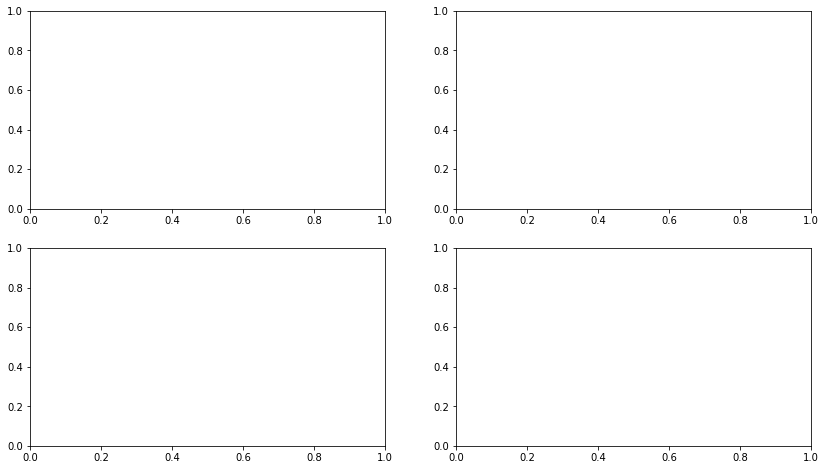

In [ ]:
fig , ax = plt.subplots(2, 2, figsize= (14,8))

In [ ]:
ax[1,1]

In [ ]:
df_mpg['cylinders'].value_counts().index

Int64Index([4, 8, 6, 3, 5], dtype='int64')

origin 0 0
cylinders 0 1
model_year 1 0
nivel_mpg 1 1


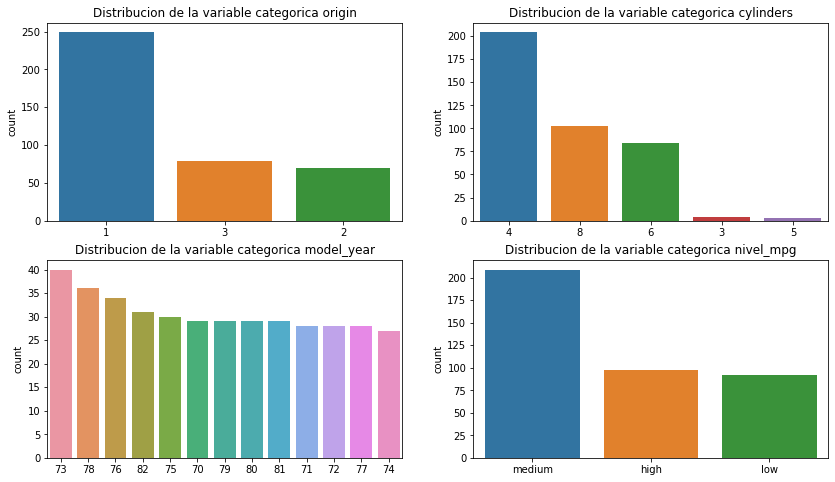

In [ ]:
#Generacion de figure de 14,8

fig , ax = plt.subplots(2, 2, figsize= (14,8))

#Ieracion de las variables para luego agregarlas en su lugar adecuado

i = 0 # variable inicial que ayudara a hacer la seleccion del lugar

for column in ['origin', 'cylinders', 'model_year', 'nivel_mpg']: # loop de la lsita de columnas a graficar

  filas, columns = set_rows_columns(i)

  print(column , filas, columns)

  # grafico de barras de cada variable
  variable = df_mpg[column] # pandas series con la info de la columna a graficas
  orden = df_mpg[column].value_counts().index # determinacion de los elemento de la variable para ordenarlo de mayor a menor cantidad

  sns.countplot(variable, order=orden, ax=ax[filas, columns]); # grafico seleccionado el ax correspondiente

  ax[filas,columns].set_xlabel(None) # para no tener la nombre de la variable en el eje x
  ax[filas, columns].set_title(f'Distribucion de la variable categorica {column}') # Generar titulo a cda subplot

  i += 1


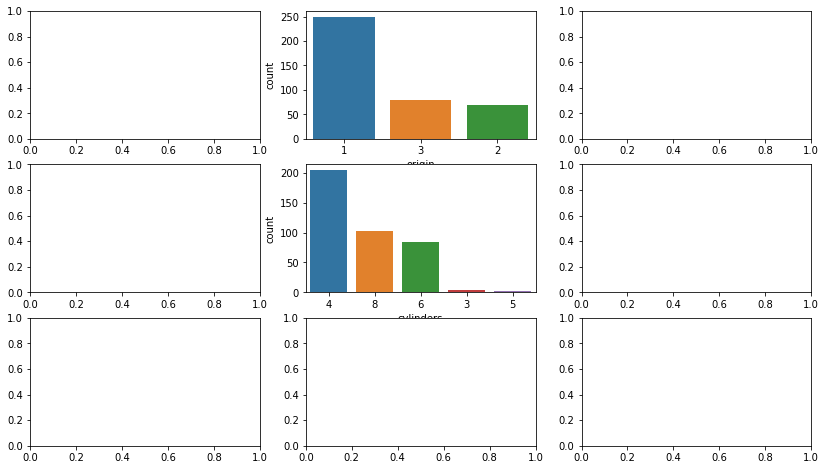

In [ ]:
fig , ax = plt.subplots(3, 3, figsize= (14,8))

variable = df_mpg['origin'] # pandas series con la info de la columna a graficas
orden = df_mpg['origin'].value_counts().index


sns.countplot(variable, order=orden, ax=ax[0, 1])

sns.countplot(df_mpg['cylinders'], order=df_mpg['cylinders'].value_counts().index, ax=ax[1,1])



# Ejemplo avanzado

Es para que tenga una idea y deseen jugar con cosas que uno puede realizar


In [ ]:
import pandas as pd
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

#process to normalize mpg variable
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()

#group by value negative o positive mpg in its normalize
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


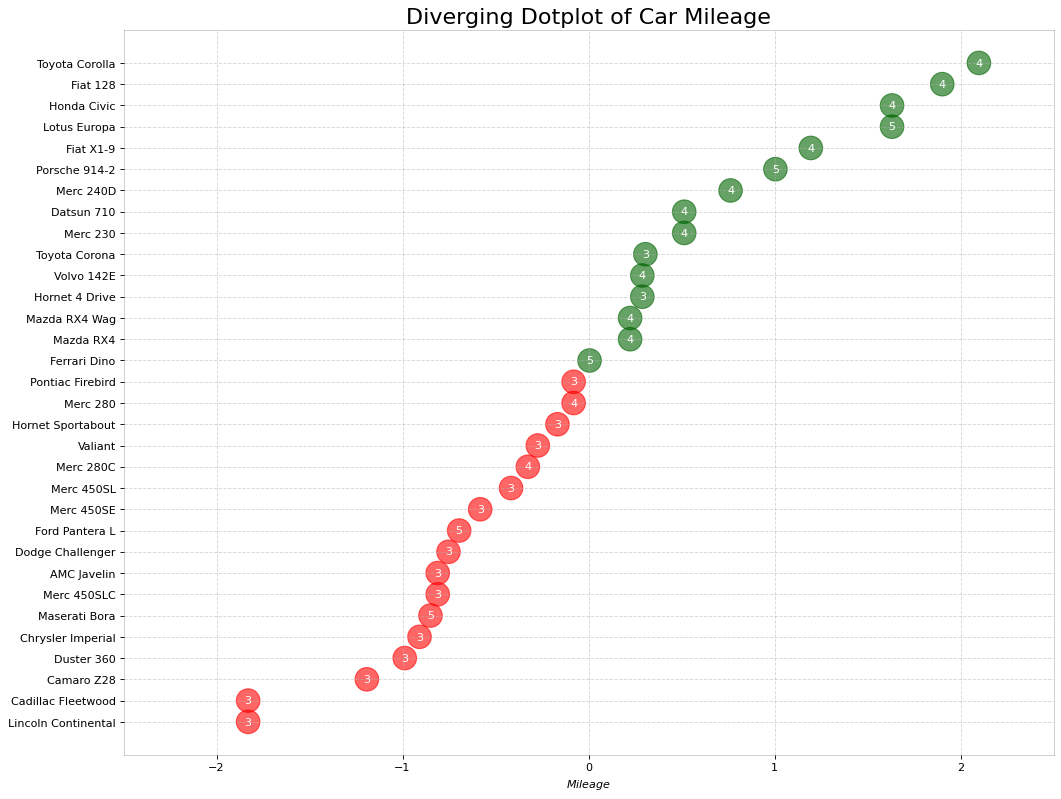

In [ ]:
# Draw plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12), dpi= 80)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)

# loop for write in circle its value
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders in fig
plt.gca().spines["top"].set_alpha(.2)
plt.gca().spines["bottom"].set_alpha(.2)
plt.gca().spines["right"].set_alpha(.2)
plt.gca().spines["left"].set_alpha(.2)


plt.yticks(df.index, df.cars) #add label in ticks y
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$') # use dolar sign to put variable name in  another format
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5) # limit ticks x
plt.show()